<a href="https://colab.research.google.com/github/bingsen-wang/Electric-Machines/blob/main/ElectricMachines_StatorLaminationArcSlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Electric Machines: Stator Lamination with Arc Slots</h1></b>

Dr. Bingsen Wang

8/8/2024
</center>

#Slot Dimensioning for Straight Tooth

##The Approximate Approach

The tooth space in rad is $\theta_{ts}=\frac{2\pi}{n_s}$ with $n_s$ being the number of slots. The slot angle spant is $\theta_{si}$ rad  at inner radius $r_i$. The arc length of the tooth is
$$w_t = r_i(\theta_{ts} - \theta_{si})\tag{1}$$

To keep the tooth straight, the arc length of the tooth at $r_i+d_s$ is approximately $w_t$. Then, the slot angle span at $r_i+d_s$ is
$$\theta_{so} = \theta_{ts} - \frac{w_t}{r_i+d_s}\tag{2}$$

Substituting (1) in (2) yields
$$\theta_{so} = \theta_{ts} - \frac{r_i}{r_i+d_s}(\theta_{ts} - \theta_{si})\tag{3}$$



##The Accurate Approach

The tooth space in rad is $\theta_{ts}=\frac{2\pi}{n_s}$ with $n_s$ being the number of slots. The slot angle span is $\theta{si}$ rad at inner radius $r_i$. The thickness of the tooth is
$$d_t = 2r_i\sin\frac{\theta_{ts} - \theta{si}}{2}\tag{4}$$

To keep the tooth straight, the tooth thickness $d_t$ stays the same. Then the angle span of the tooth at $r_i+d_s$ is $2\arcsin\frac{0.5d_t}{r_i+d_s}$.  Then, the slot angle span at $r_i+d_s$ is
$$\theta_{so} = \theta_{ts} - 2\arcsin\frac{0.5d_t}{r_i+d_s}\tag{5}$$

Substituting (5) in (4) yields
$$\theta_{so} = \theta_{ts} - 2\arcsin\left(\frac{r_i}{r_i+d_s}\sin\frac{\theta_{ts}-\theta{si}}{2}\right)\tag{6}$$






#Python Code
The Python code illustrates the stator of electric machines.

0
0
0


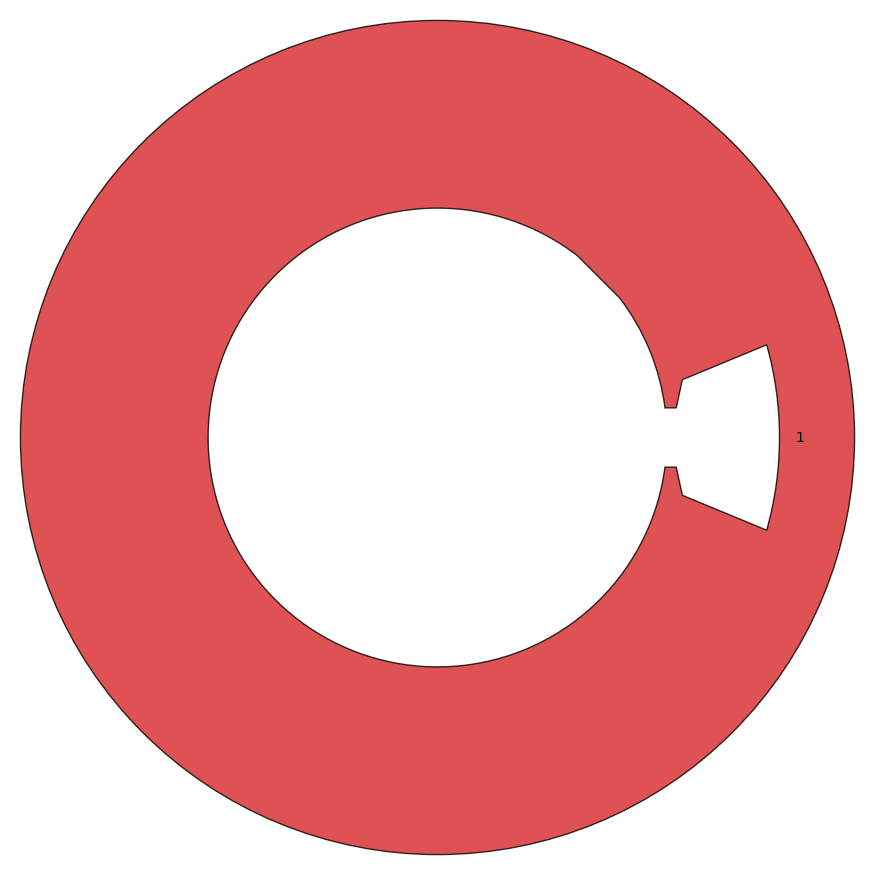

In [27]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array,sqrt,arcsin,conj
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib.patches import PathPatch,Arc,Circle
from matplotlib import animation,transforms,colors
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def axis_reset(ax): #clear axis for redrawing
  xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
  return

def draw_stator_st_round(ax,ro,ri,ns,nsp,fc='w',ec='k',lw=1,alpha=1): #straight teeth, round slot bottom
  """ro: outer radius;  ri: inner radius; ns: number of slots
  nsp: number of slots to plot"""
  ax.add_patch(mp.Circle((0,0),ro,lw=lw,fc=fc,ec=ec,alpha=alpha))
  v,c=[],[]
  ts = 2*pi/ns #tooth spacing in rad
  ws,ds = ts*.55, (ro-ri)*.6 #slot width in rad, slot depth
  wso,ws1 = ws*.6,ts-2*arcsin(ri*sin(.5*(ts-ws))/(ri+ds)) #slot opening, slot bottom angle span
  xy,xyo,xy1 = exp(-1j*ws*.5)*ri,exp(-1j*wso*.5)*ri,exp(-1j*ws1/2)*(ri+ds)
  for k in range(ns):
    if k<nsp:
      pts = np.array([xyo+.1*ds, xy+.2*ds*exp(-1j*ts/2),xy1,
          conj(xy1),conj(xy)+.2*ds*exp(1j*ts/2),conj(xyo)+.1*ds])*exp(1j*k*ts)
      v += list(zip(pts[:3].real,pts[:3].imag)); c += [Path.LINETO]*4
      ac = Path.arc(angle(pts[2],deg=True),angle(pts[3],deg=True))
      v += list(ac.vertices*abs(pts[2])); c += list(ac.codes[1:])
      v += list(zip(pts[3:].real,pts[3:].imag)); c += [Path.LINETO]*4
      ac = Path.arc((ts*k+.5*wso)*180/pi,(ts*(k+1)-.5*wso)*180/pi)
      v += list(ac.vertices*ri); c += list(ac.codes[1:])
      tr = transforms.Affine2D().rotate(ts*k)+ax.transData
      ax.text(ri+ds+.2,0,str(k+1),va='center',ha='center',transform=tr)
    else:
      v += list(Path.arc((ts*nsp+.5*wso)*180/pi,360-.5*wso*180/pi).vertices*ri)
      c += [Path.LINETO]+list(Path.arc((ts*nsp+.5*wso)*180/pi,360-.5*wso*180/pi).codes[1:])
      break
  ax.add_patch(PathPatch(Path(v+[[0,0]],[Path.MOVETO]+c[1:]+[Path.CLOSEPOLY]),
                         ec=colors.to_rgba(ec,alpha),fc='w',lw=lw))
  return

#parameters
Ntmax = 128
Nt = [2,4,6,8,12,24,36,48] #number of teeth
Nfps = len(Nt) #number of frames

xylim = [[-4.1,4.1] for _ in range(2)]
clst=['tab:red','tab:blue','tab:olive','tab:purple','tab:green','tab:orange','k','w'] #colors light bg
fig = plt.figure(figsize=(9,9))
ax=fig.add_axes((.025,.025,.95,.95),xlim=xylim[0],ylim=xylim[1],fc='none')

# animation function. This is called sequentially
def animate(i):
  # i=7+Nfps
  if i%20==0: print(i)
  ii=int(i/Nfps)
  i=i%Nfps
  axis_reset(ax) #clear axis
  if ii==0:
    draw_stator_st_round(ax,4,2.2,Nt[3],int(i+1),fc=clst[i%6],alpha=.8,lw=1)
  else:
    draw_stator_st_round(ax,4,2.2,Nt[Nfps-i-1],Nt[Nfps-i-1],fc=clst[i%6],alpha=.8,lw=1)
anim = animation.FuncAnimation(fig, animate, frames=Nfps*2)
anim.save("ElectricMachine_StatorLaminationArcSlots.mp4", writer=animation.FFMpegWriter(fps=1),dpi = 200)